# 🦸‍♀✨ Welcome to Your First Data Adventure – EDA with Superheroes!

هل فكرت يومًا كيف ممكن نستخدم تحليل البيانات لفهم عالم الشخصيات الخارقة؟  
اليوم بنبدأ أول خطوة في رحلتنا الممتعة نحو الذكاء الاصطناعي، بس بطريقة مختلفة شوي… 👀

🔍 عندنا ملف بيانات يحتوي على معلومات شخصيات مشهورة من عالم مارفل، ديزني، الأنمي، وسبيستون!  
راح نتعرّف على أبطال خارقين مثل Iron Man، Hulk، Goku، Elsa… وندرس خصائصهم مثل الطول، الوزن، القوة، الذكاء، وأكثر!
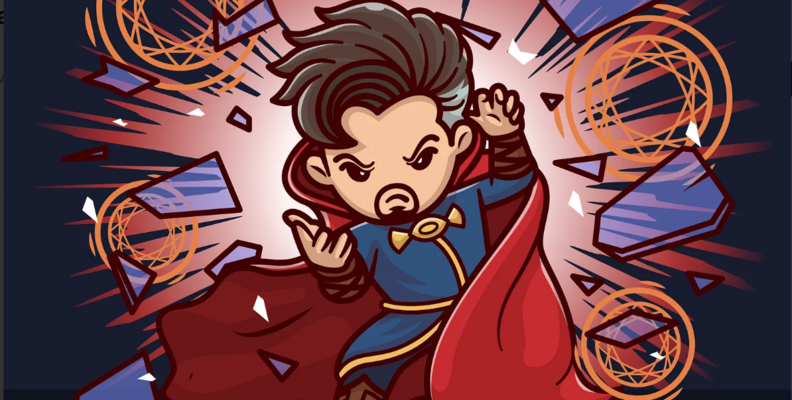

🎯 وش هدفنا اليوم؟
ما راح نبدأ تعلم الآلة مباشرة… لا لا!  
اليوم راح نسوي خطوة جدًا مهمة تسبق أي مشروع ذكاء اصطناعي، وهي:

## ✨ تحليل البيانات وتجهيزها (EDA)

🧩 خلال هذا اللاب، راح نغطي:
- قراءة البيانات واستكشافها
- التعامل مع القيم الناقصة
- القيم الشاذة
- توزيع البيانات والانحراف
- الترميز Encoding
- التطبيع Normalization
- التحضير للنموذج

🦸 مستعدين؟ خلونا نبدأ المغامرة! 🚀


In [1]:
# 📦 Step 0: استيراد المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# 📥 Step 1: Load the Dataset

# نبدأ رحلتنا بتحميل البيانات واستعراض أول القيم
df = pd.read_csv("/content/superheroes_eda_lab.csv")
df.head()


,Name,Gender,Publisher,Alignment,Height,Weight,Intelligence,Strength
0,Iron Man,Male,Marvel,GOOD,198.0,102.0,95,85
1,Wonder Woman,Female,DC,good,183.0,74.0,88,80
2,Batman,Male,DC,Good,188.0,NaN,100,70
3,Spider-Man,Male,Marvel,Good,178.0,76.0,90,55
4,Hulk,Male,Marvel,Neutral,244.0,635.0,85,100


In [ ]:
# 🔍 Step 2: Explore the Data

# نكتشف حجم البيانات وأنواع الأعمدة
print("📏 Shape:", df.shape)
df.info()
df.describe()


📏 Shape: (9, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          9 non-null      object 
 1   Gender        9 non-null      object 
 2   Publisher     9 non-null      object 
 3   Alignment     9 non-null      object 
 4   Height        8 non-null      float64
 5   Weight        8 non-null      float64
 6   Intelligence  9 non-null      int64  
 7   Strength      9 non-null      int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 708.0+ bytes


,Height,Weight,Intelligence,Strength
count,8.000000,8.000000,9.000000,9.000000
mean,188.625000,139.500000,90.888889,77.777778
std,24.189357,200.859581,4.539946,19.860625
min,168.000000,50.000000,85.000000,40.000000
25%,175.000000,60.250000,88.000000,70.000000
50%,180.500000,68.000000,90.000000,80.000000
75%,190.500000,82.500000,92.000000,95.000000
max,244.000000,635.000000,100.000000,100.000000


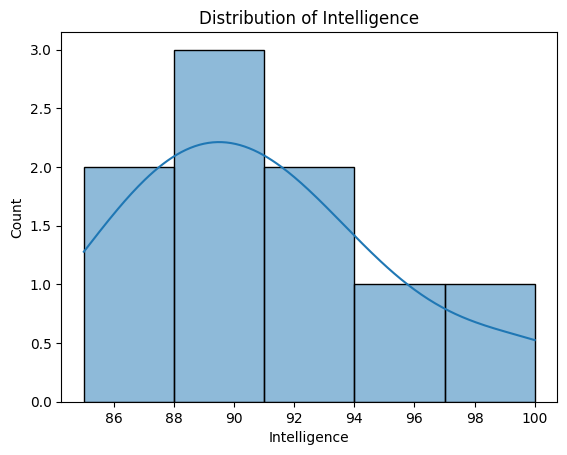

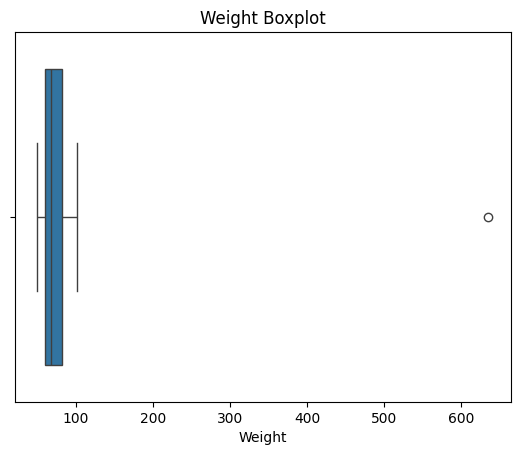

In [ ]:
# 📊 Step 3: Visual Overview Before Cleaning

# نرسم التوزيع والبوكس بلوت
sns.histplot(df['Intelligence'], kde=True)
plt.title('Distribution of Intelligence')
plt.show()

sns.boxplot(x=df['Weight'])
plt.title('Weight Boxplot')
plt.show()


In [ ]:
# ❓ Step 4: Missing Values

# نشوف القيم الناقصة ونعالجها
df.isnull().sum()

df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)

df.isnull().sum()


/tmp/ipython-input-5-535506423.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(df['Height'].mean(), inplace=True)
/tmp/ipython-input-5-535506423.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
Name,0
Gender,0
Publisher,0
Alignment,0
Height,0
Weight,0
Intelligence,0
Strength,0


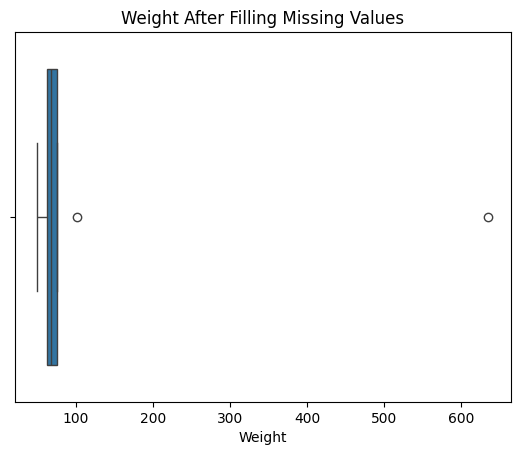

,Name,Weight
0,Iron Man,102.0
4,Hulk,635.0


In [ ]:
# ⚠ Step 5: Outliers

sns.boxplot(x=df['Weight'])
plt.title('Weight After Filling Missing Values')
plt.show()

# نحسب القيم الشاذة باستخدام IQR
q1 = df['Weight'].quantile(0.25)
q3 = df['Weight'].quantile(0.75)
iqr = q3 - q1

outliers = df[(df['Weight'] < (q1 - 1.5 * iqr)) | (df['Weight'] > (q3 + 1.5 * iqr))]
outliers[['Name', 'Weight']]


 🎯 نقاش


هل وزن شخصيه (Hulk)

 فعلا شاذ ولا طبيعي؟

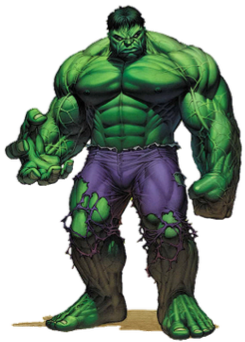

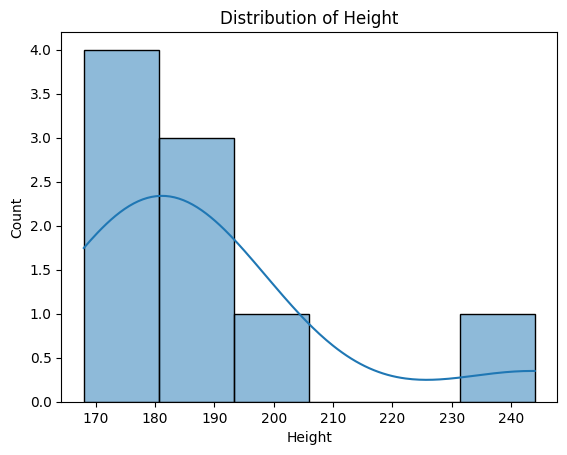

Height Skewness: 2.156071408083526


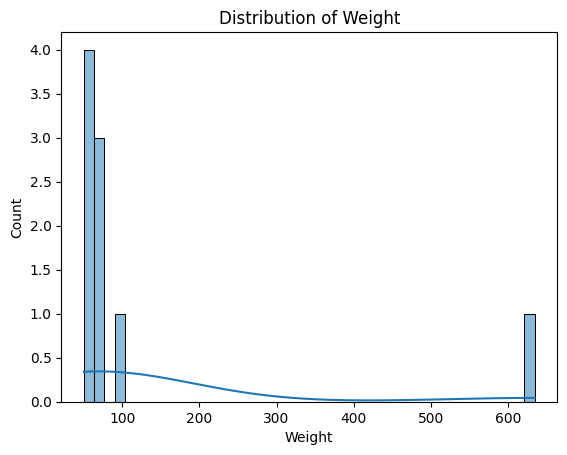

Weight Skewness: 2.9640845929400834


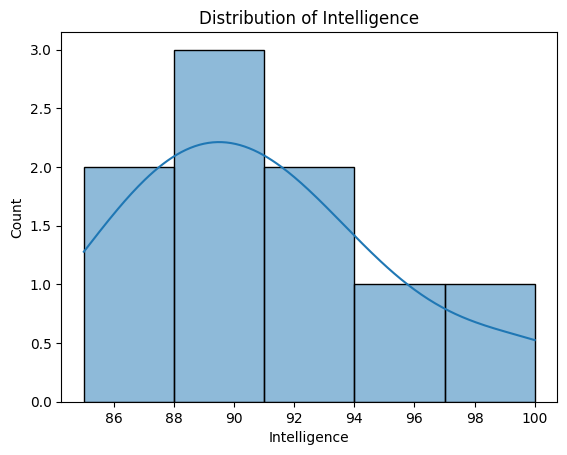

Intelligence Skewness: 0.9171144814391776


In [ ]:
# 📈 Step 6: Skewness & Distribution

# نحلل الانحراف التوزيعي
for col in ['Height', 'Weight', 'Intelligence']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    print(f'{col} Skewness:', df[col].skew())


In [ ]:
# 🔤 Step 7: Encoding Categorical Columns

# نجهز الأعمدة النصية
df['Alignment'] = df['Alignment'].str.lower().str.strip()

# تحويل النصوص لأرقام
df_encoded = pd.get_dummies(df, columns=['Gender', 'Alignment', 'Publisher'], drop_first=True)
df_encoded.head()


,Name,Height,Weight,Intelligence,Strength,Gender_Male,Alignment_neutral,Publisher_DC,Publisher_Disney,Publisher_Marvel
0,Iron Man,198.0,102.0,95,85,True,False,False,False,True
1,Wonder Woman,183.0,74.0,88,80,False,False,True,False,False
2,Batman,188.0,68.0,100,70,True,False,True,False,False
3,Spider-Man,178.0,76.0,90,55,True,False,False,False,True
4,Hulk,244.0,635.0,85,100,True,True,False,False,True


In [ ]:
# 📏 Step 8: Normalization & Scaling

# نطبع البيانات باستخدام MinMax
scaler = MinMaxScaler()
scaled_cols = ['Height', 'Weight', 'Intelligence', 'Strength']
scaled_data = scaler.fit_transform(df_encoded[scaled_cols])

# ندمج النتائج
scaled_df = pd.DataFrame(scaled_data, columns=[col + '_scaled' for col in scaled_cols])
df_final = pd.concat([df_encoded.reset_index(drop=True), scaled_df], axis=1)
df_final.head()


,Name,Height,Weight,Intelligence,Strength,Gender_Male,Alignment_neutral,Publisher_DC,Publisher_Disney,Publisher_Marvel,Height_scaled,Weight_scaled,Intelligence_scaled,Strength_scaled
0,Iron Man,198.0,102.0,95,85,True,False,False,False,True,0.394737,0.088889,0.666667,0.750000
1,Wonder Woman,183.0,74.0,88,80,False,False,True,False,False,0.197368,0.041026,0.200000,0.666667
2,Batman,188.0,68.0,100,70,True,False,True,False,False,0.263158,0.030769,1.000000,0.500000
3,Spider-Man,178.0,76.0,90,55,True,False,False,False,True,0.131579,0.044444,0.333333,0.250000
4,Hulk,244.0,635.0,85,100,True,True,False,False,True,1.000000,1.000000,0.000000,1.000000


❌ Step 9: Common Mistakes to Avoid

 تنبيهات مهمة:
 - لا تحذف القيم الشاذة بدون تحليل
 - لا تبدأ التدريب بدون تطبيع
 - لا ترمز البيانات النصية قبل معالجة القيم الناقصة

 ✅ كل شيء عندنا مضبوط 👌

In [ ]:
# 🤖 Step 10: Prepare Data for Machine Learning

# الحين نختار الأعمدة المدخلة للنموذج
X = df_final[[col for col in scaled_df.columns]]
X.head()


,Height_scaled,Weight_scaled,Intelligence_scaled,Strength_scaled
0,0.394737,0.088889,0.666667,0.750000
1,0.197368,0.041026,0.200000,0.666667
2,0.263158,0.030769,1.000000,0.500000
3,0.131579,0.044444,0.333333,0.250000
4,1.000000,1.000000,0.000000,1.000000


# ✅ الخاتمة:

 🎉 أنجزنا لاب كامل، وصرنا جاهزين نبني اي نموذح ذكاء اصطناعي  

 📦 بياناتنا:
 - نظيفة
 - مرمّزة
 - مطبّعة
 - وجاهزة 100% للنمذجة

💡 في اللاب الجاي: نبني نموذج حقيقي وندربه على التنبؤ! 🚀

## **شكراً لكم أبطال البيانات! 💪🧠**
